# Linear Regression

Linear Regression is one of the most basic machine learning algorithms and is used to find linear relations between one or more inputs and the output.

See [here](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#linear-regression) for some useful stuffs, though not as useful as paying attention to what you have learnt.

First, we import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
#from sklearn.datasets import load_boston, load_linnerud
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data
The file containing data is `weatherHistory.csv`. Open it using pandas, with the headers in the first rows, and put the resulting DataFrame into variable `weather_data`.

In [2]:
weather_data = pd.read_csv('weatherHistory.csv')

## Simple data visualization
Generally, after we load in any types of data, we would want to _visualize_ them into graphs and charts which are more intuitive. For example, the `pandas` library provide an inbuilt 2d plot function for its `DataFrame` objects. Quite useful if we want to concentrate only on two or three properties.

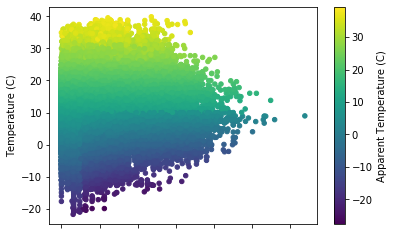

In [3]:
x_field = "Wind Speed (km/h)"
y_field = "Temperature (C)"
c_field = "Apparent Temperature (C)"
weather_data.plot.scatter(x_field, y_field, c=c_field, colormap='viridis')

It is also shipped with inbuilt correlation function, although if you want nifty pretty images, you have to work for it since it only provide you with the 2D matrix. Call the function `DataFrame.corr` to retrieve the correlation matrix from the DataFrame object, and create an `matplotlib.axes.Axes` that can be seen from `matplotlib`. You can create a tuple of (Figure, Axes) from `matplotlib.pyplot.subplots`.

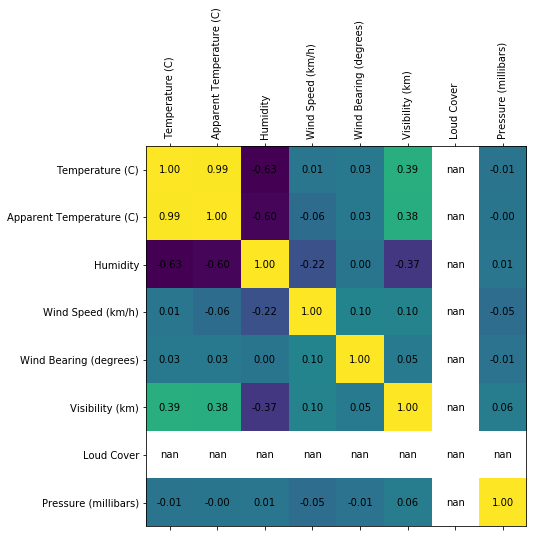

In [4]:
# your code here
from matplotlib.axes import Axes
correlation_matrix = weather_data.corr()
fig, ax = plt.subplots(figsize=(7, 7))
# ax.imshow(correlation_matrix)
ax.matshow(correlation_matrix)

# label them with the respective list entries
ax.set_xticklabels(correlation_matrix.columns.values.tolist())
ax.set_yticklabels(correlation_matrix.columns.values.tolist())
# change xticks and labels
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
# ax.tick_params(top=True, labeltop=True, labelbottom=False, bottom=False)
plt.xticks(rotation=90)

for i, column in enumerate(correlation_matrix.values):
    for j, value in enumerate(column):
        text = ax.text(j, i, "%.2f" % value,
                       ha="center", va="center", color="black")

# sns.heatmap(data=correlation_matrix, annot=True, center=0, cmap="coolwarm")
plt.show()

## Extra considerations
* For a good linear regression model, we select features with high positive or negative correlation. High absolute correlation often means that the paired variables \*moves\* similarly to each other.
* When selecting features, avoid having multi-co-linearity within features since they may introduce noises. Search [here](https://stats.stackexchange.com/a/1150) for more.

## Helper functions
All functions we required for this assignment have already been provided by `sklearn` library; However, they are not strictly a requirement - students can implement their own versions as they see fit.

In [5]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
weather_data["bias"] = 1
train_data, test_data = train_test_split(weather_data, train_size=0.8, test_size=0.2, random_state=0)

## LinearRegression
### Extracting data
Your first task is to write a function extracting features from both training and test data. The format is provided below. Make sure to view the two function call in the cell below to easier understand what is wanted.

The "bias" field is mostly for helping those who build their custom model, as `sklearn`'s implementation already have bias by default.

In [7]:
def extract_features_and_labels(data, features_name, labels_name):
    # Your codes here
    features_data = data[features_name].values
    labels_data = data[labels_name].values
    return features_data, labels_data

In [8]:
# Run this after the function had been written
train_features, train_labels = extract_features_and_labels(train_data, ["Temperature (C)", "bias"], "Apparent Temperature (C)")
test_features, test_labels = extract_features_and_labels(test_data, ["Temperature (C)", "bias"], "Apparent Temperature (C)")

### Create and train model instances
Now, create two models that fit to the training data (features and labels). Again, you can either make them yourself, or consult the imported functions/classes. The first model will use matrix solving least-squared and called `linear_model`; the second will use gradient descent and called `sgd_model`. Both can only train on the **(train_features, train_labels)** set only.

Remember, both must conform to the model interface from sklearn, which means, at minimum, the functions <i>fit</i> for training and <i>predict</i> for inference.

In [9]:
linear_model = LinearRegression().fit(train_features, train_labels)
sgd_model = SGDRegressor().fit(train_features, train_labels)

### Visualize the result
After the model had been constructed and trained, we can apply them on the test set **(test_features, test_labels)** and calculate the MSE score to evaluate their performance. However, it will not be as intuitive as plotting our models on a 2D space as we will do below.

MSE for linear model: 1.68
MSE for gradient descent model: 1.68


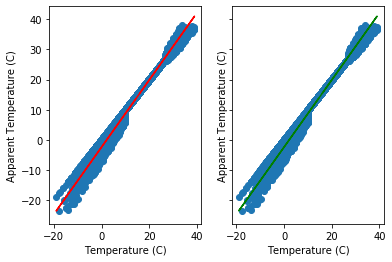

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# scatter on both
datapoint_x = test_features[:, 0]
datapoint_y = test_labels
ax1.scatter(datapoint_x, datapoint_y)
ax2.scatter(datapoint_x, datapoint_y)

# draw the linear version on 1 and sgd on 2
linear_y = linear_model.predict(test_features)
ax1.plot(datapoint_x, linear_y, color="red")
sgd_y = sgd_model.predict(test_features)
ax2.plot(datapoint_x, sgd_y, color="green")

ax1.set_xlabel("Temperature (C)")
ax2.set_xlabel("Temperature (C)")
ax1.set_ylabel("Apparent Temperature (C)")
ax2.set_ylabel("Apparent Temperature (C)")

error_linear = mean_squared_error(test_labels, linear_y)
error_sgd = mean_squared_error(test_labels, sgd_y)
print("MSE for linear model: {:.2f}\nMSE for gradient descent model: {:.2f}".format(error_linear, error_sgd))

### Multiple Regression models
As you can see, the previous example is a no-brainer - "Apparent Temperature" are closely linked to "Temperature", and one alone can easily make a good guess on the other. The harder problem is if we can predict other aspect, such as "Visibility". 

Choose two features you think will work best and train the two models just as above. Save them into variables `linear_model_multiple` and `sgd_model_multiple`. Think:
* What will be good two features to put into this new model?
* How well do those features correlate with the label? With each other?
* Is there a risk of collinearity between your features?

In [27]:
features = ["Temperature (C)", "Humidity", "bias"]
labels = "Visibility (km)"
train_features, train_labels = extract_features_and_labels(train_data, features, labels)
test_features, test_labels = extract_features_and_labels(test_data, features, labels)
linear_model_multiple = LinearRegression().fit(train_features, train_labels)
sgd_model_multiple = SGDRegressor().fit(train_features, train_labels)

### 3D visualization
Since we now have two features instead of one, plotting the result of the regression on 2D would be quite clunky. Good thing that the `matplotlib` library also provide us with a 3D plotting function. The block of code below will draw it for you, provide that you have put your models in the right places (`linear_model_multiple` and `sgd_model_multiple`) and them having correct interface (`fit` and `predict`).

MSE for linear multiple model: 14.47
MSE for gradient descent multiple model: 14.47


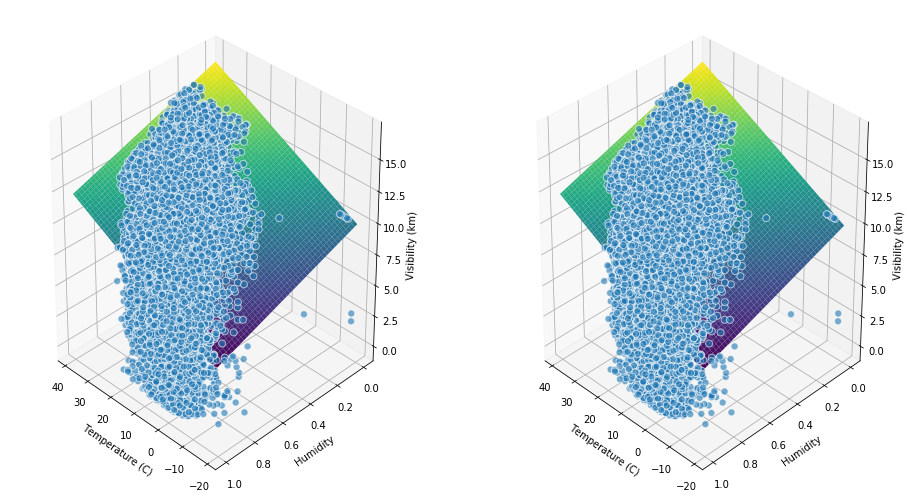

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(16, 9))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

#to Add a color bar which maps values to colors.
feature_1 = test_features[:, 0]
feature_2 = test_features[:, 1]
ax1.scatter(feature_1, feature_2, test_labels, s=50, alpha=0.6, edgecolors='w')
ax2.scatter(feature_1, feature_2, test_labels, s=50, alpha=0.6, edgecolors='w')

x_dimension = np.linspace(np.amin(feature_1), np.amax(feature_1), 100)
y_dimension = np.linspace(np.amin(feature_2), np.amax(feature_2), 100)
mesh_x, mesh_y = np.meshgrid(x_dimension, y_dimension)
#print(np.shape(mesh_x), np.shape(mesh_y))
mesh_features = np.stack([mesh_x, mesh_y, np.ones_like(mesh_x)], axis=-1)
mesh_features = np.reshape(mesh_features, [-1, 3])

linear_z = linear_model_multiple.predict(mesh_features)
linear_z = np.reshape(linear_z, np.shape(mesh_x))
#xs, ys, zs = np.meshgrid(feature_1, feature_2, linear_y, sparse=True)
ax1.plot_surface(mesh_x, mesh_y, linear_z, cmap=cm.viridis, linewidth=0.2)
#zs = np.array([[model.predict([x, y]) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(xs, ys)])

sgd_z = sgd_model_multiple.predict(mesh_features)
sgd_z = np.reshape(sgd_z, np.shape(mesh_x))
#xs, ys, zs = np.meshgri(feature_1, feature_2, sgd_y, sparse=True)
ax2.plot_surface(mesh_x, mesh_y, sgd_z, cmap=cm.viridis, linewidth=0.2)

error_linear = mean_squared_error(test_labels, linear_model_multiple.predict(test_features))
error_sgd = mean_squared_error(test_labels, sgd_model_multiple.predict(test_features))
print("MSE for linear multiple model: {:.2f}\nMSE for gradient descent multiple model: {:.2f}".format(error_linear, error_sgd))
for ax in [ax1, ax2]:
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(labels)
    ax.view_init(azim=135)
    
plt.axis('tight')
plt.show()